## Final Project Submission

Please fill out:
* Student name: Celine Sitina
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Faith Rotich
* Blog post URL:https://www.blogger.com/blog/post/edit/6822590473975592201/5762541750273018997


# Movie creation analysis
## Project Goal
This project analysis aims to expolore the types of films that are currently doing well at the box office to help the company new movie studio decide on what type of movie films to create.
# Business understanding
Big companies are creating original video content.The company has also decided to join in and create a new movie studio.

# Business problem
AS the company decides to join in and create new movies,the challenge is the company does not know which types of movies to create.

On this project we shall be exploring what types of movies are currrently doing well at the box office ,then translating those findings into actionable insights that the head of the companies new movie studio can use to help decide what types of films to create.

The following are some of the questions that guide the analysis.

- which category of movie is growing or declining over time?
- what genres are most profitable?
- Which movies are more popular over time?
- what is the recommended runtime for movies created?
- How is production cost affecting profit?
- How does production_budget vary across various genres?

## Data source and exploration
The data is from different sources ,and based on the area of interest , i shall be exploring every dataset and from which ,pick two that answer our questions better.
The following are the provided datasets:
- im.db
- rt.movie_info.tsv
- rt.reviews.tsv
- tmdb.movies.csv
- tn.movie_budgets.csv
 
Based on the business needs and questions ,i will explore the datasets and select two datasets that best fit in answering the objective.


## Importing necessary Libraries

importing pandas library

importing numpy for calculations

importing seaborn and matplotlib for visuals

importing warnings to ignore warnings and for clean code

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import zipfile
import sqlite3
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exploring the different datasets
The followinng datasets have been provided and based on the business objective i will explore each to see which will be most useful.
- im.db
- rt.movie_info.tsv
- rt.reviews.tsv
- tmdb.movies.csv
- tn.movie_budgets.csv

In [2]:
#Loading the dataset
df_bom_movies=pd.read_csv(r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz",
             
               )
df_bom_movies.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df_bom_movies.columns.tolist()


['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [4]:
#Loading the dataset
df_tmdb_movies=pd.read_csv(r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv.gz",
             
               )
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
df_tmdb_movies.columns.tolist()


['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [6]:

# Load and preview first 10 rows
df2_preview = pd.read_csv(
    r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\rt.movie_info.tsv.gz",
    sep='\t',
    compression='gzip',
    engine='python',
    nrows=10,                # Only load first 10 rows
    on_bad_lines='skip'     # Skip lines that break the format
)

df2_preview.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
# rt_movie_info
df2_preview .columns.tolist()

['id',
 'synopsis',
 'rating',
 'genre',
 'director',
 'writer',
 'theater_date',
 'dvd_date',
 'currency',
 'box_office',
 'runtime',
 'studio']

In [8]:
#Loading the dataset
df_tn_movie_budget=pd.read_csv(r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz",
             
               )
df_tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
df_tn_movie_budget.columns.tolist()

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross']

In [10]:
df_rt_preview = pd.read_csv(
    r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\rt.reviews.tsv.gz",
    sep='\t',
    compression='gzip',
    engine='python',
    on_bad_lines='skip',   # skip problematic lines
    nrows=10               # just preview first 10 lines
)

df_rt_preview.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
df_rt_preview.columns.tolist()


['id',
 'review',
 'rating',
 'fresh',
 'critic',
 'top_critic',
 'publisher',
 'date']

In [12]:
zip_path = r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData\im.db.zip"
extract_path = r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 2\Phase2_project\dsc-phase-2-project-v3\zippedData"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("successfull")


successfull


In [13]:
# Connect to the database
conn = sqlite3.connect(extract_path + r"\im.db")

df_tables= pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df_tables




,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Based on my analysis I will work with tn.movie_budgets.csv ,this dataset has columns that allow me to do statistical analysis on price and the im.db.zip datasets.

The im.db dataset has a wide range of information, and also tn.movie_budget is rich in numbers which will be useful in showing the budget of creating a movie and also the profits.

Next i will explore and clean the datasets separately before merging.

# EDA on tn.movie_budget.csv dataset


In [14]:
df_tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
# showing the columns of tn.movies_budget
df_tn_movie_budget.columns.tolist()

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross']

In [16]:
# displaying the shape of tn.movies_budget
df_tn_movie_budget.shape

(5782, 6)

In [17]:
# displaying the infomation of tn.movies_budget
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
df_tn_movie_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [19]:
# displaying the descriptive statistics of tn.movies_budget
df_tn_movie_budget.describe(include='object')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [20]:
# checking for null values in tn.movies_budget
df_tn_movie_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
# since our dataset has no null values,we can now check for duplicates
df_tn_movie_budget.duplicated().sum()


0

Data cleaning 


In [22]:
# Confirming the datatypes of the columns in tn.movies_budget
df_tn_movie_budget.dtypes


id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [23]:
# The following columns need cleaning( release date,production budget,domestic_gross and worldwide_gross)

# converting production_budget,domestic_gross and worldwide_gross to a float and removing the dollar sign.
currency_columns = ["production_budget","domestic_gross","worldwide_gross"]

#using  a for loop to clean each column
for col in currency_columns:
 df_tn_movie_budget[col] = (
    df_tn_movie_budget[col].astype('str').str.replace('[\$,]', '', regex=True).astype(float)
 )

# converting the release_date column from object to date
df_tn_movie_budget['release_date'] = pd.to_datetime(df_tn_movie_budget['release_date'])


In [24]:
# confirming the changes made to the columns
df_tn_movie_budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

In [25]:
# displaying the cleaned dataframe
df_tn_movie_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


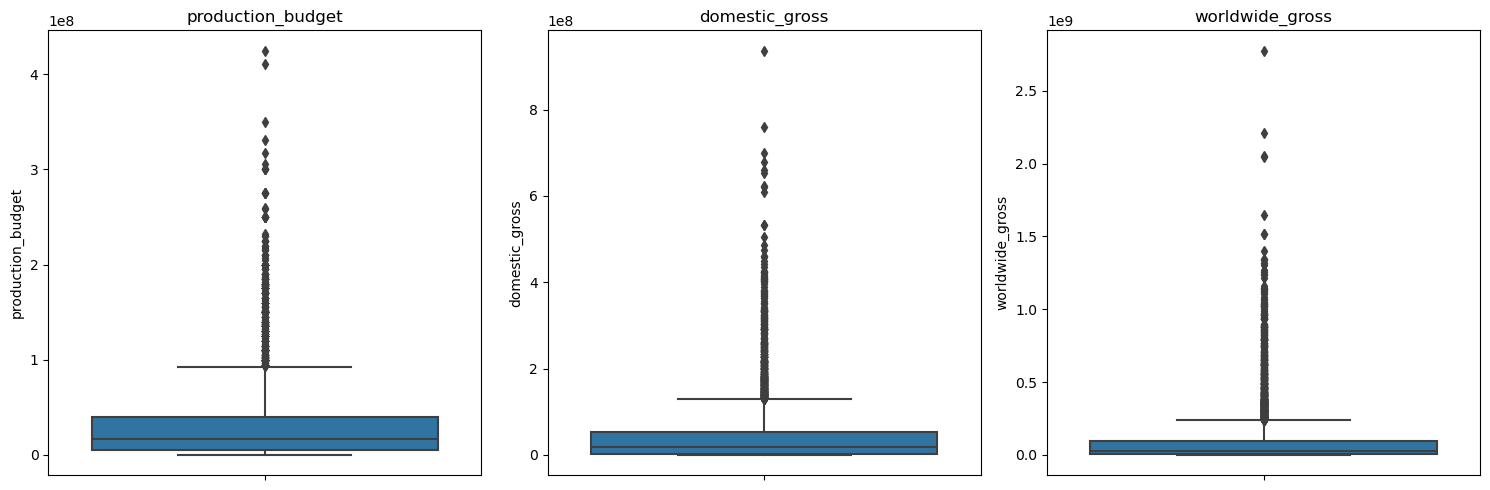

In [26]:
# checkinng for outliers in tn.movie_budget
# Columns to include (excluding 'id')
numeric_cols = df_tn_movie_budget.select_dtypes(include='number').drop(columns='id').columns
# Set plot size
plt.figure(figsize=(15, 5))

# Loop through columns and plot subplots
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_tn_movie_budget[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

Based on the analysis , i will keep the outliers as they are real values and based on the data which is price ,it is useful to know which movies are perfoming better.

# EDA on im.db dataset


In [27]:
# displaying the tables in the database
df_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Primary focus is on the movie_ratings and movie_basics tableq

In [28]:
# creating a dataframe of movie_basics table for easier analysis
movie_basics = pd.read_sql("SELECT * FROM movie_basics ;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [29]:
#creating a dataframe movie_ratings using the movie_ratings table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings ;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Movie basics dataframe cleaning

In [30]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [31]:
# checking the shape of movie_basics
movie_basics.shape

(146144, 6)

In [32]:
# what are the columns in movie_basics
movie_basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [33]:
# displsying the information in movie basics
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [34]:
# displaying the percentage of null values in each column of movie_basics
movie_basics.isnull().sum()/ len(movie_basics)  * 100 

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [35]:
#Drop missing values in genres and runtime_minutes and original_tittle

movie_basics = movie_basics.dropna(subset = ['genres','runtime_minutes','original_title'])



In [36]:
movie_basics.isnull().sum()/ len(movie_basics)  * 100 


movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64

In [37]:
# confirming the datatypes in movie_basics
movie_basics.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

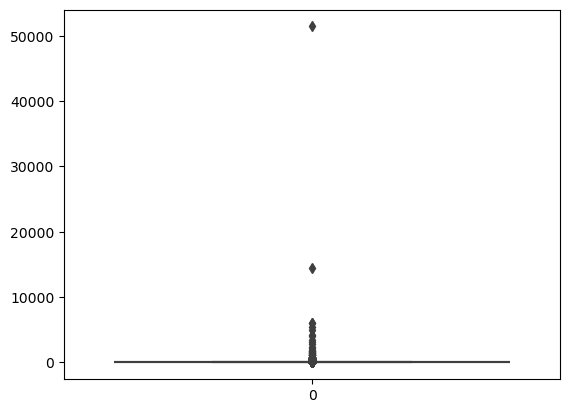

In [38]:
# checking for outliers in movie_basics using scatterplots
#plotting the scatter plot

# plotting a scatter plot to show outliers in movie_basics
sns.boxplot(data=movie_basics['runtime_minutes'])
plt.show()



 the outlier is minimal 

Data cleaning on movie_ratings

In [39]:
movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [40]:
# checking the shape of movie_ratings
movie_ratings.shape

(73856, 3)

In [41]:
# displaying the information in movie_ratings
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [42]:
# checking for null values in movie_ratings
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [43]:
# checking the datatypes in movie_ratings
movie_ratings.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

<Axes: ylabel='numvotes'>

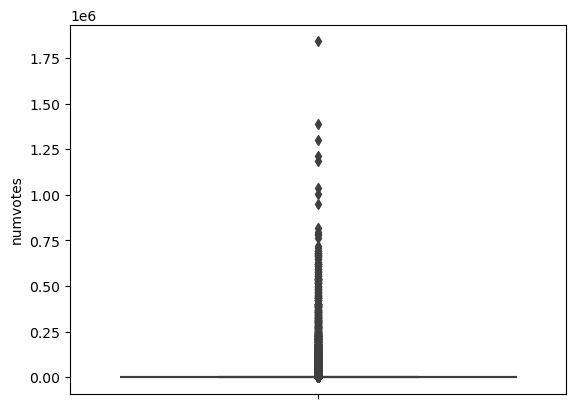

In [44]:
# check for outliers in movvie_ratings for the numvotes column and average rating
sns.boxplot(y=movie_ratings['numvotes'])

<Axes: ylabel='averagerating'>

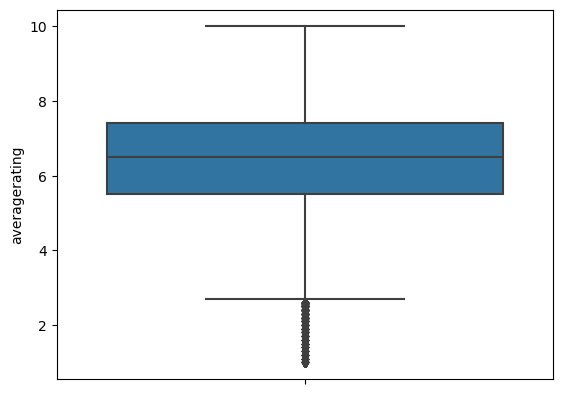

In [45]:
# checking for outliers in movie-ratings averagerating
sns.boxplot(y=movie_ratings['averagerating'])

In [46]:
movie_ratings.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [47]:
#checking for duplicates in movie_ratings
movie_ratings.duplicated().sum()

0

# Merging of the dataframes

in movie_basics(Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
)
    movie_ratings (Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
)
    df_tn_movie_budget(Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object'))

In [48]:
#Checking for unique values in movie_basics
movie_basics['movie_id'].is_unique

True

In [49]:
#Checking for unique values in movie_basics 
movie_ratings['movie_id'].is_unique

True

In [50]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [51]:
#Checking for unique values in movie_basics 
movie_ratings['movie_id'].is_unique

True

In [52]:
df_tn_movie_budget['movie'].is_unique

False

In [53]:
df_tn_movie_budget['id'].is_unique

False

In [54]:
df_tn_movie_budget['movie'].is_unique


False

In [55]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [56]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
# merging the movie_basics and movie_ratings using inner join on movie_id
df_movie = pd.merge (movie_basics,movie_ratings, on= 'movie_id', how= 'inner')
df_movie

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [58]:
# merging df_movie with df_tn_movie_budget
df_tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [59]:
# merging the df_movie with df_tn_movie_budget

#converting the columns to lower_case
df_movie['primary_title_lower'] = df_movie['primary_title'].str.lower()
df_tn_movie_budget['movie_lower'] = df_tn_movie_budget['movie'].str.lower()


# merging the dataframes.
movies_merged  = pd.merge(df_movie,df_tn_movie_budget,left_on='primary_title_lower',right_on='movie_lower',how='inner')
movies_merged


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_title_lower,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_lower
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,foodfight!
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,the secret life of walter mitty,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,the secret life of walter mitty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,tt8976472,Never Again,Ei koskaan enää,2018,69.0,"Documentary,Music",6.6,27,never again,47,2002-07-12,Never Again,500000.0,307631.0,308793.0,never again
2807,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,heroes,12,2008-10-24,Heroes,400000.0,655538.0,655538.0,heroes
2808,tt8941440,Virus,Virus,2019,152.0,"Drama,Thriller",8.6,372,virus,69,1999-01-15,Virus,75000000.0,14010690.0,30626690.0,virus
2809,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,push,70,2009-02-06,Push,38000000.0,31811527.0,49678401.0,push


In [60]:
# displaying the shape of the merged dataframe
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_id             2811 non-null   object        
 1   primary_title        2811 non-null   object        
 2   original_title       2811 non-null   object        
 3   start_year           2811 non-null   int64         
 4   runtime_minutes      2811 non-null   float64       
 5   genres               2811 non-null   object        
 6   averagerating        2811 non-null   float64       
 7   numvotes             2811 non-null   int64         
 8   primary_title_lower  2811 non-null   object        
 9   id                   2811 non-null   int64         
 10  release_date         2811 non-null   datetime64[ns]
 11  movie                2811 non-null   object        
 12  production_budget    2811 non-null   float64       
 13  domestic_gross       2811 non-nul

In [61]:
# checking for missing values in the merged dataframe
movies_merged.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating          0
numvotes               0
primary_title_lower    0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
movie_lower            0
dtype: int64

# Data visualization

In [62]:
#for better analysis , i will create a new column of genres that will contain only individual genre per row.
# since the genres column is column with items separated by commas ,i slit the column into a list and then explode it to create a new row for each genre
movies_merged['new_genres'] = movies_merged['genres'].str.split(',')
movies_merged=movies_merged.explode('new_genres')
movies_merged['new_genres']=movies_merged['new_genres'].str.strip()
movies_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_title_lower,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_lower,new_genres
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,foodfight!,Action
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,foodfight!,Animation
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,foodfight!,Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road,Adventure
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road,Drama


In [63]:
# checking for duplicates after splitting the genres
movies_merged.duplicated().sum()

0

In [64]:
# dropping the duplicated rows
movies_merged = movies_merged.drop_duplicates(subset='movie_id')
movies_merged.duplicated().sum() #checking for duplicates again to confirm they have been removed.


0

In [65]:
# Finding out the to 10 genres.
# creating a dataframe with top 10 genres
top_10_genres_df = movies_merged['new_genres'].value_counts().reset_index().head(10)
top_10_genres_df.columns = ['genre', 'count']
top_10_genres_df

,genre,count
0,Drama,658
1,Action,595
2,Comedy,497
3,Adventure,213
4,Horror,174
5,Biography,166
6,Documentary,148
7,Crime,140
8,Thriller,35
9,Animation,20


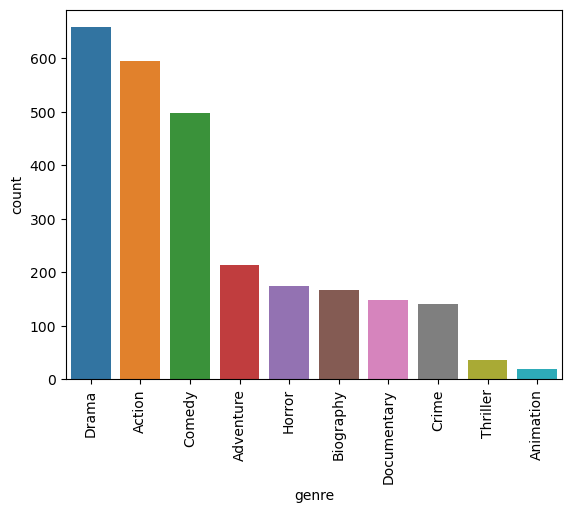

In [66]:
# plotting for the top_10_genres

sns.barplot(data=top_10_genres_df,x='genre',  y='count')
plt.xlabel('genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show() 

from the above plot Drama genre has a higher count compared to sci-fi

In [67]:
#check the year that has most movies produced
top_10_years = movies_merged['start_year'].value_counts().reset_index().head(10)
top_10_years.columns = ['year', 'count']
top_10_years

,year,count
0,2014,351
1,2015,334
2,2013,322
3,2011,312
4,2012,296
5,2010,292
6,2016,290
7,2017,230
8,2018,206
9,2019,66


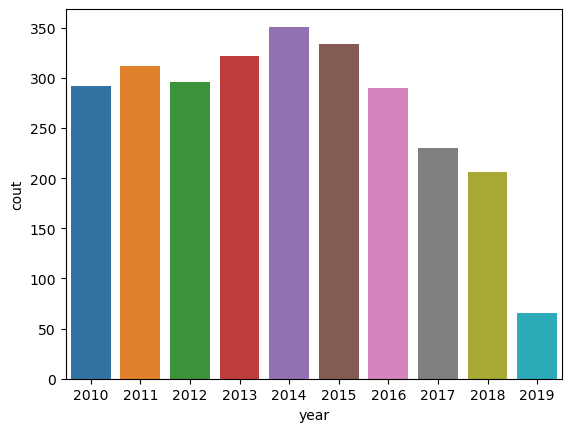

In [68]:
#display the top 10 years with most movies produced and plotting the top 10 years
sns.barplot(data=top_10_years, x='year', y='count')
plt.xlabel('year')
plt.ylabel('cout')
plt.show()

In the year 2014 ,there was a hire number of movies.this leaves the question of what movies were being produced in that year and the profit.


In [69]:
#creating a new column named profit.
#This is to find out which movies are generating a higher profit over the years and to also find out the movies are generating profits in relation to their ratings and num_vote
movies_merged['profit'] = movies_merged['worldwide_gross'] - movies_merged['production_budget']
movies_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_title_lower,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_lower,new_genres,profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,foodfight!,Action,-44926294.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road,Adventure,-15686698.0
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road,Drama,-15686698.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,on the road,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,on the road,Drama,-15686698.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,the secret life of walter mitty,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,the secret life of walter mitty,Adventure,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,tt8976472,Never Again,Ei koskaan enää,2018,69.0,"Documentary,Music",6.6,27,never again,47,2002-07-12,Never Again,500000.0,307631.0,308793.0,never again,Documentary,-191207.0
2807,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,heroes,12,2008-10-24,Heroes,400000.0,655538.0,655538.0,heroes,Documentary,255538.0
2808,tt8941440,Virus,Virus,2019,152.0,"Drama,Thriller",8.6,372,virus,69,1999-01-15,Virus,75000000.0,14010690.0,30626690.0,virus,Drama,-44373310.0
2809,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,push,70,2009-02-06,Push,38000000.0,31811527.0,49678401.0,push,Documentary,11678401.0


In [70]:
# now i would like to analyze the relationship between profit,genres 

#grouping the movies ny genres and then calculating the avarage profit for each genre
#first grouping the genres
grouped_genres= movies_merged.groupby('new_genres')

#calculating the average profit for each genre
genre_avg_profit = grouped_genres['profit'].mean()
#sorting the genres by average profit
genre_avg_profit = genre_avg_profit.sort_values(ascending=False)

#Checking for the top  10 profitable genre
top_profitable_genres_df = genre_avg_profit.head(10).reset_index()
top_profitable_genres_df.columns = [ 'genre', 'average_profit']
top_profitable_genres_df


,genre,average_profit
0,Fantasy,2.089859e+08
1,Family,1.823599e+08
2,Adventure,1.654161e+08
3,Animation,1.372433e+08
4,Action,1.292807e+08
5,Sci-Fi,1.254988e+08
6,Mystery,7.592248e+07
7,Horror,6.035553e+07
8,Biography,4.467698e+07
9,Thriller,4.063665e+07


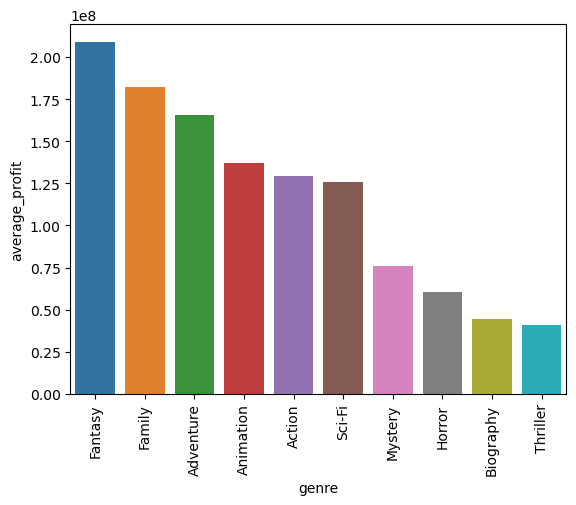

In [71]:
#plotting the top profitable geres
sns.barplot(data=top_profitable_genres_df, x= 'genre', y='average_profit')
plt.xlabel('genre')
plt.ylabel('average_profit')
plt.xticks(rotation=90)
plt.show()

In [72]:
#i want to check  how often was fantasy,Family and Adventure are produced over the years
#filtering  for only these genre.
top3_profitable_movies= movies_merged[movies_merged['new_genres'].isin(['Fantasy','Family','Adventure'])]

# checking how often they are produced over the years
top3_profitable_movies_trend = top3_profitable_movies.groupby(['start_year', 'new_genres']).size().reset_index(name='count')
top3_profitable_movies_trend.columns = ['year','genre', 'count']
top3_profitable_movies_trend


,year,genre,count
0,2010,Adventure,17
1,2010,Fantasy,3
2,2011,Adventure,20
3,2011,Family,1
4,2011,Fantasy,3
5,2012,Adventure,21
6,2012,Family,1
7,2012,Fantasy,1
8,2013,Adventure,32
9,2013,Family,1


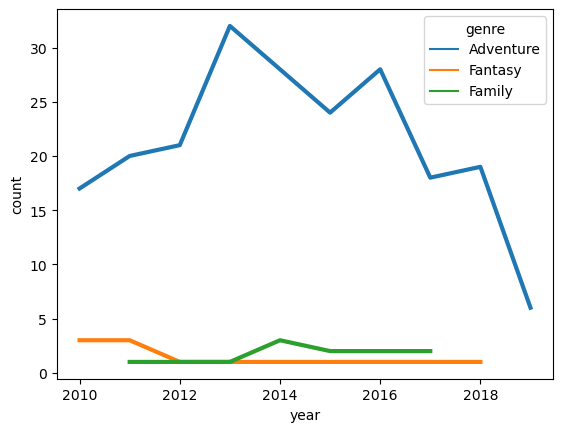

In [73]:
# plotting the top 3 profitable movies trend
sns.lineplot(data=top3_profitable_movies_trend, x= 'year',y='count',hue='genre',linewidth=3)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

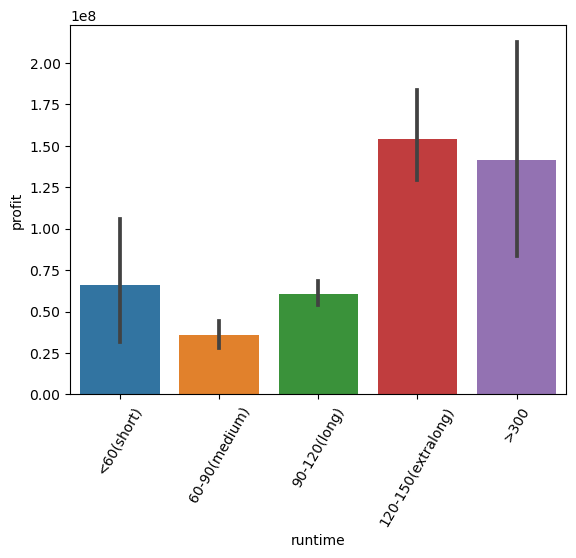

In [74]:
# what is the relationship between runtime in minutes and the profit?
# using a bar plot to visualizethe relation,i will first group the minutes into bins 
#less than 60(short),60-90(medium).90-120(long),<120(extra long))

# putting the runtime into bins
bins = [0,60,90,120,150,300]
labels=['<60(short)', '60-90(medium)','90-120(long)','120-150(extralong)','>300']
movies_merged['runtime'] = pd.cut(movies_merged['runtime_minutes'],bins=bins,labels=labels)

sns.barplot(data=movies_merged,x='runtime',y='profit')
plt.xlabel('runtime')
plt.ylabel('profit')
plt.xticks(rotation=60)
plt.show()


From the above plot it is seen that movies with a runtime of 120-150 minutes are having the highest profit while 60-90 minutes are having the lowest.

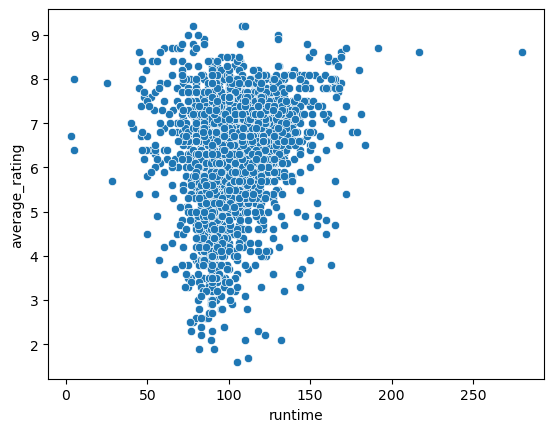

In [75]:
#relationship between average rating and runtime
sns.scatterplot(data= movies_merged, x='runtime_minutes',y='averagerating')
plt.xlabel('runtime')
plt.ylabel('average_rating')
plt.show()




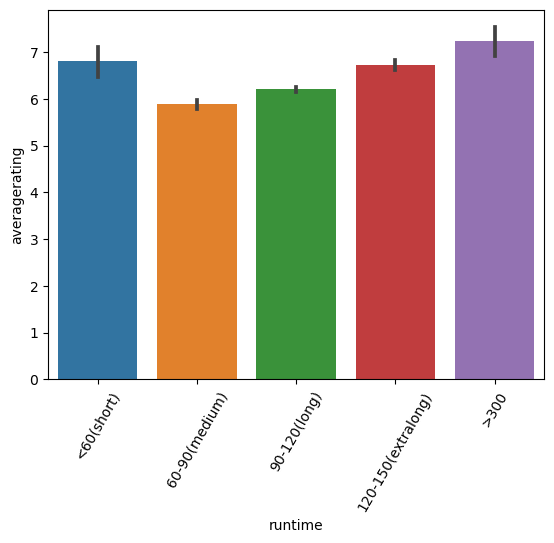

In [76]:
#checking the relationship btn average rating and runtime using barplot
#relationship between average rating and runtime
bins = [0,60,90,120,150,300]
labels=['<60(short)', '60-90(medium)','90-120(long)','120-150(extralong)','>300']
movies_merged['runtime'] = pd.cut(movies_merged['runtime_minutes'],bins=bins,labels=labels)

sns.barplot(data=movies_merged,x='runtime',y='averagerating')
plt.xlabel('runtime')
plt.ylabel('averagerating')
plt.xticks(rotation=60)
plt.show()




From my analysis and answering the question the company is recommended to to produce movies focusing on the genre of Fanatasy,Family and adventure ,also check on the reviews.

Avoid creating low runtime movies

In [77]:
#exporting the merged dataframe to a csv file
movies_merged.to_csv('movies.csv', index=False)
